<a href="https://colab.research.google.com/github/Hugo-16/panorama_covid19/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama do COVID-19




by [Hugo Leonardo](https://hugo-16.github.io/)

---

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

---

#Obtenção dos Dados

O dataset que usaremos foi feito pela [Our World in Data](https://ourworldindata.org/), uma startup sem fins lucrativos — que tem como missão combinar dados e pesquisas acadêmicas sobre as tendências que moldam o mundo como o conhecemos hoje. Não apenas isso, mas também apresentá-las e explicá-las de forma clara e interativa.

#####* Dados referentes 2020-02-24 à 2021-09-26
---

#Dicionário de variáveis

O dataset que utilizaremos possui uma quantidade total de 64 colunas, no entanto para esta análise exploatória utilizaremos aenas as seguintes:

>
* `total_cases` - Total de casos confirmados com COVID-19.
* `total_deaths` - Total de mortes atribuídas a COVID-19.
* `location` - Localização divida por continentes e países além de uma visão gral do mundo.
* `date` - data.
* `people_vaccinated` - Número total de pessoas que receberam pelo menos uma dose de vacina.
* `people_fully_vaccinated` - Número total de pessoas que receberam todas as doses prescritas pelo protocolo de vacinação.

#Importando dados do COVID-19

In [ ]:
#Importação pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [ ]:
#Importação do dataset e transformação em DataFrame
data_path = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(data_path)

---
#Análise Exploratória dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estraturados.

In [ ]:
#Visualizar 5 primeiras entradas do DataFrame.
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
#Visualizar tamanho do DataFrame.
df.shape

(119911, 65)

In [ ]:
#Exatrair nome das colunas.
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
#Visuzaliar tipos de variáveis.
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 65, dtype: object

In [ ]:
#Visualizar porcentagem de valores ausentes das colunas em ordem descrescente.
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                 0.989684
weekly_icu_admissions_per_million     0.989684
weekly_hosp_admissions_per_million    0.981837
weekly_hosp_admissions                0.981837
total_boosters                        0.976091
                                        ...   
continent                             0.045617
population                            0.006788
location                              0.000000
date                                  0.000000
iso_code                              0.000000
Length: 65, dtype: float64

In [ ]:
#Transformar coluna date em datetime.
df.date = pd.to_datetime(df.date)

O código na célula abaixo irá garantir que sempre utilizaremos a data mais recente de casos, isso se faz necssário pois este dataset é atualizado regularmente.

In [ ]:
#Separar data mais recente de países com mais casos e mortes.
data_atualizada = (df.date).sort_values(ascending=False).head(1)
df_str = pd.Series.to_string(data_atualizada)
separar = df_str.split()
separar[1]

'2021-09-28'

#Q1 - Quais países possuem mais casos e mortes por COVID-19?

In [ ]:
#Ver casos mais recentes de países com mais casos e mortes.
df.loc[df.date == separar[1]].sort_values(by="total_cases", ascending=False)[6:11]
df.loc[df.date == separar[1]].sort_values(by="total_deaths", ascending=False)[6:11]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
114247,USA,North America,United States,2021-09-28,43227604.0,111162.0,115782.857,692583.0,2157.0,1993.143,129845.740,333.905,347.785,2080.359,6.479,5.987,NaN,21201.0,63.683,73624.0,221.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391152574.0,213752856.0,185265610.0,3399837.0,487651.0,624537.0,116.30,63.56,55.09,1.01,1857.0,61.57,3.329151e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
15882,BRA,South America,Brazil,2021-09-28,21381790.0,15395.0,19242.286,595446.0,793.0,572.286,99917.969,71.941,89.920,2782.543,3.706,2.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234674906.0,150269515.0,88983740.0,NaN,1412943.0,1396215.0,109.66,70.22,41.58,NaN,6525.0,NaN,2.139934e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
50207,IND,Asia,India,2021-09-28,33716451.0,18870.0,26421.857,447751.0,378.0,283.286,24197.095,13.542,18.962,321.335,0.271,0.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321780.0,565730031.0,406.004,0.949,1527759.0,1.096,NaN,NaN,samples tested,873244661.0,641845931.0,231398730.0,NaN,4470545.0,7344057.0,62.67,46.06,16.61,NaN,5271.0,NaN,1.393409e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
70344,MEX,North America,Mexico,2021-09-28,3645599.0,9792.0,8576.286,276376.0,700.0,542.286,27986.618,75.171,65.839,2121.690,5.374,4.163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.302622e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
1176,OWID_AFR,NaN,Africa,2021-09-28,8256838.0,8775.0,10906.000,209598.0,388.0,407.714,6011.590,6.389,7.940,152.603,0.282,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149491085.0,90717622.0,58892007.0,NaN,55228.0,1971333.0,10.88,6.60,4.29,NaN,1435.0,NaN,1.373486e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


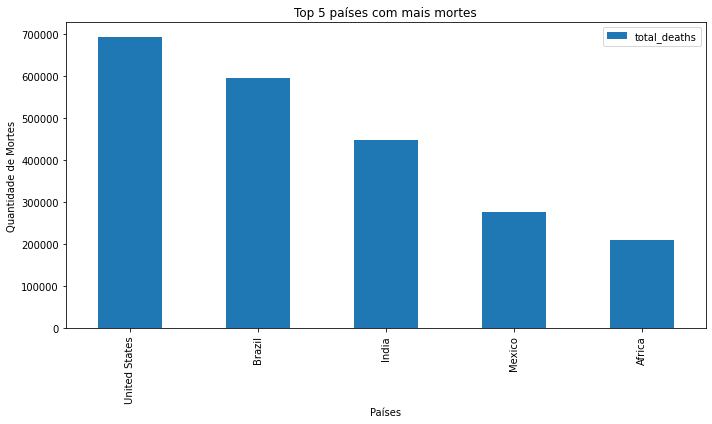

In [ ]:
#Plot do gráfico de linhas com o total de casos
top5_deaths = df.loc[df.date == separar[1], ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[6:11]
fig, ax = plt.subplots(figsize=(10,6))
top5_deaths.plot(x="location", y="total_deaths", kind="bar", ax=ax)

ax.set_title("Top 5 países com mais mortes")
ax.set_xlabel("Países")
ax.set_ylabel("Quantidade de Mortes")

plt.tight_layout()

No gráfico acima é possível observar que o país com mais mortes por COVID é o Estados Unidos, mas será que é possível descobrirmos o motivo disso através das informações que possuimos neste dataset?

#Q2 - Como foi a evolução do COVID-19 no mundo?



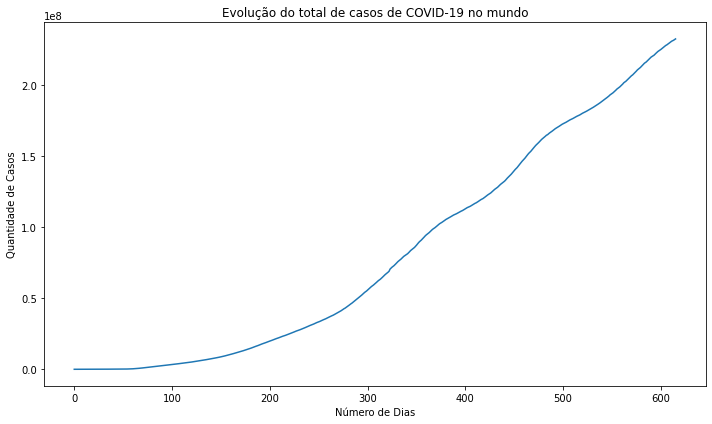

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
df_3 = df.loc[df.location == 'World', 'total_cases'].reset_index(drop=True).plot(kind='line', ax=ax)
ax.set_title("Evolução do total de casos de COVID-19 no mundo")
ax.set_xlabel('Número de Dias')
ax.set_ylabel('Quantidade de Casos')
plt.tight_layout()

---
#Análise Exploratória no Brasil

#Q3 - Quando foi registrada a primeira morte no Brasil?

In [ ]:
#Criar cópia do DataFrame apenas com informações sobre o Brasil
df_brasil = df.loc[df.location == 'Brazil'].copy()

#Indentificar quando foi registrada a primeira morte no Brasil
data_atualizada1 = df_brasil.loc[df_brasil.total_deaths==1, 'date']
df_str1 = pd.Series.to_string(data_atualizada1)
separar1 = df_str1.split()
print(f'A primeira morte no Brasil foi registrada em: {separar1[1]}')
df_brasil.tail()

A primeira morte no Brasil foi registrada em: 2020-03-17


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
15878,BRA,South America,Brazil,2021-09-24,21327616.0,19438.0,35342.429,593663.0,699.0,584.286,99664.812,90.835,165.157,2774.211,3.266,2.730,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1457765.0,NaN,NaN,NaN,NaN,6812.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
15879,BRA,South America,Brazil,2021-09-25,21343304.0,15688.0,16139.857,594200.0,537.0,527.429,99738.122,73.311,75.422,2776.721,2.509,2.465,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230477848.0,148959378.0,86085238.0,NaN,NaN,1411550.0,107.70,69.61,40.23,NaN,6596.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
15880,BRA,South America,Brazil,2021-09-26,21351972.0,8668.0,16027.000,594443.0,243.0,527.286,99778.628,40.506,74.895,2777.856,1.136,2.464,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231844536.0,149349669.0,87063618.0,NaN,1366688.0,1360269.0,108.34,69.79,40.69,NaN,6357.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
15881,BRA,South America,Brazil,2021-09-27,21366395.0,14423.0,16961.143,594653.0,210.0,528.286,99846.028,67.399,79.260,2778.838,0.981,2.469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233261963.0,149841174.0,87994741.0,NaN,1417427.0,1540467.0,109.00,70.02,41.12,NaN,7199.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
15882,BRA,South America,Brazil,2021-09-28,21381790.0,15395.0,19242.286,595446.0,793.0,572.286,99917.969,71.941,89.920,2782.543,3.706,2.674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234674906.0,150269515.0,88983740.0,NaN,1412943.0,1396215.0,109.66,70.22,41.58,NaN,6525.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


#Q4 - Considerando o primeiro caso de COVID-19 registrado, quantos dias se passaram até registrarmos a primeira morte?

In [ ]:
#Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
primeiro_caso = df_brasil.loc[df_brasil.total_cases==1, 'date']
df_str2 = pd.Series.to_string(primeiro_caso.head(1))
separar2 = df_str2.split()
date1 = datetime.strptime(separar1[1], '%Y-%m-%d').date()
date2 = datetime.strptime(separar2[1], '%Y-%m-%d').date()
register_fs_death = date1 - date2
print(f'Considerando o primeiro caso de COVID-19 registrado, se passaram {register_fs_death.days} dias até registrarmos a primeira morte.')

Considerando o primeiro caso de COVID-19 registrado, se passaram 20 dias até registrarmos a primeira morte.


#Q5 - Como foi a evolução de casos de COVID-19 no Brasil?


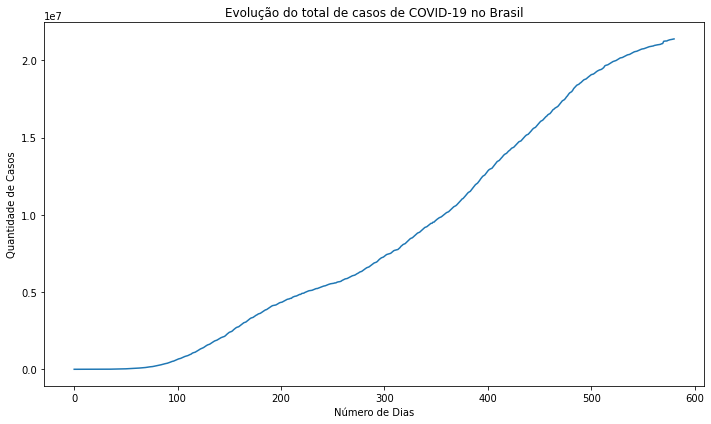

In [ ]:
#Plotar gráfico de linha em escala linear para os casos totais
fig, ax = plt.subplots(figsize=(10,6))
df_brasil.loc[df_brasil.location == 'Brazil', 'total_cases'].reset_index(drop=True).plot(kind='line', ax=ax)
ax.set_title("Evolução do total de casos de COVID-19 no Brasil")
ax.set_xlabel('Número de Dias')
ax.set_ylabel('Quantidade de Casos')
plt.tight_layout()

#Q6 - Como foi a evolução da quantidade de mortes por COVID 19?

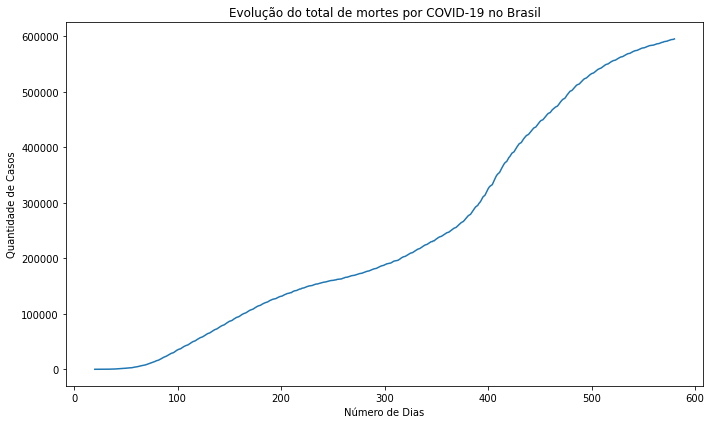

In [ ]:
#Plotar gráfico de linha em escala linear para mortes totais.
fig, ax = plt.subplots(figsize=(10,6))
df_brasil.loc[df_brasil.location == 'Brazil', 'total_deaths'].reset_index(drop=True).plot(kind='line', ax=ax)
ax.set_title("Evolução do total de mortes por COVID-19 no Brasil")
ax.set_xlabel('Número de Dias')
ax.set_ylabel('Quantidade de Casos')
plt.tight_layout()

---
#Vacinação

#Q7 - Quais países possuem mais pessoas parcialmente vacinadas?

Ao analisar está questão podemos notar algo interessante, só a India possui mais pessoas vacinadas parcialmente do que toda a Europa, América do Norte, União Européia e América do Sul, isso da devido...



Text(0, 0.5, 'Quantidade de pessoas vacinadas')

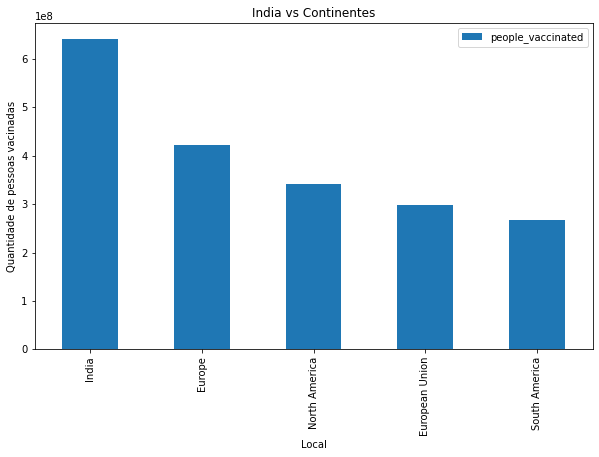

In [ ]:
top5_vacin = df.loc[df.date == separar[1], ['location', 'people_vaccinated']].sort_values(by="people_vaccinated", ascending=False)[2:7]
fig, ax = plt.subplots(figsize=(10,6))
top5_vacin.plot(x="location", y="people_vaccinated", kind="bar", ax=ax)
top5_vacin.head(20)
ax.set_title('India vs Continentes')
ax.set_xlabel('Local')
ax.set_ylabel('Quantidade de pessoas vacinadas')

Abaixo da India os países que mais vacinaram são so seguintes:

Text(0, 0.5, 'Quantidade de pessoas vacinadas')

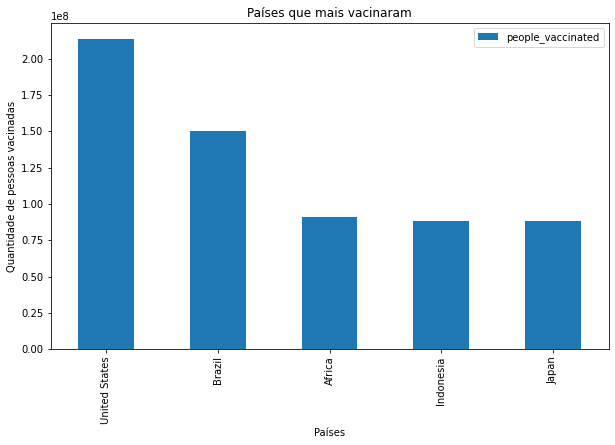

In [ ]:
top5_country = df.loc[df.date == separar[1], ['location', 'people_vaccinated']].sort_values(by="people_vaccinated", ascending=False)[7:12]
top5_country.head(20)
fig, ax = plt.subplots(figsize=(10,6))
top5_country.plot(x="location", y="people_vaccinated", kind="bar", ax=ax)
top5_country.head(20)
ax.set_title('Países que mais vacinaram')
ax.set_xlabel('Países')
ax.set_ylabel('Quantidade de pessoas vacinadas')

#Q8 - Quais países possuem mais pessoas completamente vacinadas?



Ao analisarmos os países que possuem mais pessoas completamente vacinadas notamos algo semelhante ao ocorrido entre a India e alguns continentes; os Estados Unidos possuem mais habitantes completamente vacinados do que toda a América do sul.
Ao verficar as datas das primeiras doses aplicadas podemos observar que os Estados Unidos iniciou a vacinação antes de qualquer país da América do Sul, talvez seja esse o motivo de possuirem um número maior de pessoas completamente vacinadas. 

Text(0, 0.5, 'Quantidade de pessoas vacinadas')

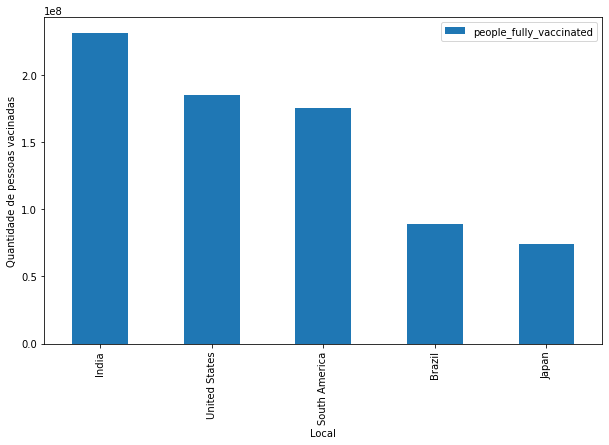

In [ ]:
top5_vacin_full = df.loc[df.date == separar[1], ['location', 'people_fully_vaccinated']].sort_values(by="people_fully_vaccinated", ascending=False)[5:10]
fig, ax = plt.subplots(figsize=(10,6))
top5_vacin_full.plot(x="location", y="people_fully_vaccinated", kind="bar", ax=ax)
ax.set_xlabel('Local')
ax.set_ylabel('Quantidade de pessoas vacinadas')

#Conclusão

O foco principal desse estudo foi abordar o número de casos, mortes e vacinação no momento atual da pandemia. Embora os dados nos permitam fazer algumas conclusões, o cenário é muito mais complexo e necessitaríamos de estudo muito maus aprofundado.
No entanto, podemos observar que ainda temos uma crescente de casos e morte por COVID-19 em diversos lugares do mundo, tornando assim de extrema importância a vacinação em massa.